<a href="https://colab.research.google.com/github/sayanarajasekhar/pandas/blob/main/Data_Wrangling_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives

After completing this lab you will be able to:

 - Handle missing data in different ways
 - Correct the data type of different data values as per requirement
 - Standardize and normalize the appropriate data attributes
 - Visualize the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables


### Importing Required Libraries

Recommend you import all required libraries in one place


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the dataset

In [55]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [56]:
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Verify loading by displaying the dataframe summary using `dataframe.info()`

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


View the first 5 values of the updated dataframe using `dataframe.head()`

In [58]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Note that we can update the `Screen_Size_cm` column such that all values are rounded to nearest 2 decimal places by using `numpy.round()`


In [59]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data.


> Used **`df.isnull()`** scans through all data and assigns `boolean` value if the value is `null or NaN`

In [60]:
missing_data = df.isnull()
missing_data

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,False,False,False


> **`df.columns.values.tolist()`** gets all the column names in data frame to list

In [61]:
for column in df.columns.values.tolist():
  print(column)

Unnamed: 0
Manufacturer
Category
Screen
GPU
OS
CPU_core
Screen_Size_cm
CPU_frequency
RAM_GB
Storage_GB_SSD
Weight_kg
Price


> **`df['columns_name'].value_counts()`** will return the column details

In [62]:
missing_data['Weight_kg'].value_counts()

,count
Weight_kg,
False,233
True,5


In [63]:
df['Weight_kg'].value_counts()

,count
Weight_kg,
2.20,21
2.00,14
2.50,11
1.36,9
1.70,9
...,...
2.37,1
1.23,1
1.28,1


In [64]:
for column in df.columns.values.tolist():
  print(missing_data[column].value_counts())
  print('\n')

Unnamed: 0
False    238
Name: count, dtype: int64


Manufacturer
False    238
Name: count, dtype: int64


Category
False    238
Name: count, dtype: int64


Screen
False    238
Name: count, dtype: int64


GPU
False    238
Name: count, dtype: int64


OS
False    238
Name: count, dtype: int64


CPU_core
False    238
Name: count, dtype: int64


Screen_Size_cm
False    234
True       4
Name: count, dtype: int64


CPU_frequency
False    238
Name: count, dtype: int64


RAM_GB
False    238
Name: count, dtype: int64


Storage_GB_SSD
False    238
Name: count, dtype: int64


Weight_kg
False    233
True       5
Name: count, dtype: int64


Price
False    238
Name: count, dtype: int64




# Task - 2

### Replace with mean
Missing values in attributes that have continuous data are best replaced using `Mean` value. We note that values in `Weight_kg` attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [65]:
missing_data[['Weight_kg', 'Screen_Size_cm']].value_counts()

,,count
Weight_kg,Screen_Size_cm,
False,False,229
True,False,5
False,True,4


> `astype()` function converts the values to the desired data type

> `axis=0` indicates that the mean value is to calculated across all column elements in a row.

In [66]:
# astype() function converts the values to the desired data type
# axis=0 indicates that the mean value is to calculated across all column elements in a row.
weight_mean = df['Weight_kg'].astype(float).mean(axis=0)
weight_mean

np.float64(1.8622317596566522)

In [67]:
df['Weight_kg'] = df['Weight_kg'].replace(np.nan, weight_mean)
missing_data = df.isnull()

In [68]:
missing_data['Weight_kg'].value_counts()

,count
Weight_kg,
False,238


### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in `Screen_Size_cm` attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [69]:
df['Screen_Size_cm'].value_counts()

,count
Screen_Size_cm,
39.62,89
35.56,64
38.10,23
33.78,20
33.02,18
43.94,7
43.18,5
31.75,4
30.48,4


In [70]:
max_value = df['Screen_Size_cm'].value_counts().idxmax()
max_value

np.float64(39.62)

In [71]:
missing_data['Screen_Size_cm'].value_counts()

,count
Screen_Size_cm,
False,234
True,4


In [72]:
df['Screen_Size_cm'] = df['Screen_Size_cm'].replace(np.nan, max_value)
missing_data = df.isnull()
missing_data['Screen_Size_cm'].value_counts()

,count
Screen_Size_cm,
False,238


# Task - 3

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  238 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       238 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [74]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

# Task - 4

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [76]:
# Data standardization: convert weight from kg to pounds
df['Weight_kg'] = df['Weight_kg'] * 2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

In [77]:
df.columns.tolist()

['Unnamed: 0',
 'Manufacturer',
 'Category',
 'Screen',
 'GPU',
 'OS',
 'CPU_core',
 'Screen_Size_cm',
 'CPU_frequency',
 'RAM_GB',
 'Storage_GB_SSD',
 'Weight_pounds',
 'Price']

In [78]:
# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [79]:
df.columns.tolist()

['Unnamed: 0',
 'Manufacturer',
 'Category',
 'Screen',
 'GPU',
 'OS',
 'CPU_core',
 'Screen_Size_inch',
 'CPU_frequency',
 'RAM_GB',
 'Storage_GB_SSD',
 'Weight_pounds',
 'Price']

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [80]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [81]:
df['CPU_frequency']

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690
...,...
233,0.896552
234,0.827586
235,0.896552
236,0.862069


# Task - 5

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


**`np.linspace()`** to split the values into groups

In [82]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [83]:
group_names = ['Low', 'Medium', 'High']

In [85]:
df['Price'].value_counts()

,count
Price,
1117,4
1142,4
888,4
1396,4
1714,3
...,...
1855,1
1891,1
2236,1


In [86]:
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
df['Price-binned'].value_counts()

,count
Price-binned,
Low,160
Medium,72
High,6


plot the bar graph of these bins

Text(0.5, 1.0, 'Price bins')

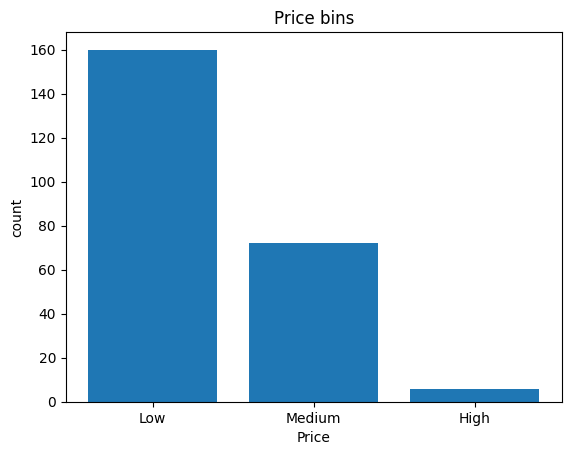

In [87]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

# Task - 6

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [88]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [89]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5         14.000000   
1           1         Dell         3    1   1         3         15.598425   
2           2         Dell         3    1   1         7         15.598425   
3           3         Dell         4    2   1         5         13.299213   
4           4           HP         4    2   1         7         15.598425   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  \
0       0.551724       8             256        3.52800    978          Low   
1       0.689655       4             256        4.85100    634          Low   
2       0.931034       8             256        4.85100    946          Low   
3       0.551724       8             128        2.69010   1244          Low   
4       0.620690       8             256        4.21155    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False       